## Problem Statement:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses via several means and once these people land on the website and fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails and typically around 30% of the leads get converted. 

As company lead conversion rate is very poor so to make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

 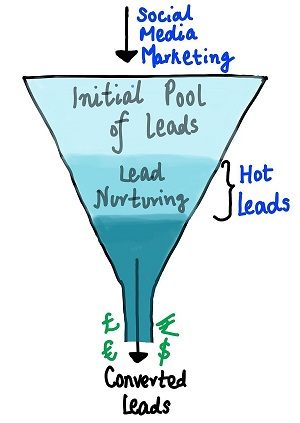


As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


## Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot.
The model should be able to adjust to if the company's requirement changes in the future. 


In [1]:
# Importing necessary library
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# to display maximum columns
pd.set_option('display.max_columns', None)

## Reading and Understanding the data

In [4]:
# reading input data
leads_df = pd.read_csv('Leads.csv')

In [5]:
# checking sample data
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# dimensions of data
leads_df.shape

(9240, 37)

In [7]:
# checking columns null data
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###### Inference:
- Many columns have null values. We need to treat these null values
- Some of the columns have value as 'Select' as mentioned in the problem statement. This value is equivalent to NULL values
- Hence, replacing the 'Select' value with NULL

## EDA

In [8]:
# checking count of unique values in each column
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

##### Inference:
- Many columns have single values, these single values won't help in understanding or identifying the distribution or pattern in the data
- Dropping these columns will de-cluter the data

In [9]:
# dropping columns
leads_df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1, inplace=True)
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

In [10]:
# replacing value 'Select' with NULL
leads_df = leads_df.replace('Select', np.NaN)

In [11]:
# checking missing values
round((leads_df.isnull().sum()/len(leads_df))*100, 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free cop

##### Inference:
- Some columns have missing values greater than 30%
- For such columns, we will be dropping those columns
- For the remaining ones, we will analyze and then take a call
- The data is Missing Completely At Random (MCAR) as the columns are not dependent on one another

In [12]:
# removing columns having more than 30% missing values
cols=leads_df.columns[round((leads_df.isnull().sum()/len(leads_df))*100)>=30]
leads_df = leads_df.drop(cols, axis=1)

In [13]:
# checking the null distribution again
round((leads_df.isnull().sum()/len(leads_df))*100, 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Search                                            0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Prospect ID                                       0.00
Lead Number                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Cal

In [14]:
# checking distribution of values for column 'What matters most to you in choosing a course'
leads_df['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [15]:
# checking distribution of values for column 'What is your current occupation'
leads_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [16]:
# checking distribution of values for column 'Country'
leads_df['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [17]:
# checking distribution of values for column 'TotalVisits' and 'Page Views Per Visit'
leads_df[['TotalVisits', 'Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [18]:
# checking median value
leads_df[['TotalVisits', 'Page Views Per Visit']].median()

TotalVisits             3.0
Page Views Per Visit    2.0
dtype: float64

In [19]:
# checking distribution of values for column 'Last Activity'
leads_df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [20]:
# checking distribution of values for column 'Lead Source'
leads_df['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [21]:
# checking for the duplicates
leads_df[leads_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity


##### Inference:
- 99.95 %  data for column 'What matters most to you in choosing a course' has value 'Better Career Prospects'. Since, there is no distribution to identify the patterns. Hence, dropping the column
- On 'Country', 95.7% data is from 'India'. Since, there is no distribution to identify the patterns. Hence, dropping the column
- On 'What is your current occupation', we can see distribution of data. Hence, converting the missing values data into category 'Missing Data'
- For 'Last Activity' column, we can see distribution of data. Hence, imputing the missing value of data into a separate category 'Missing Data'
- On 'Lead Source', we can see the distribution of data. Hence, imputing the missing value of data into a separate category 'Missing Data'
- For 'TotalVisits' and 'Page Views Per Visit', there is a difference between Mean and Median values due to presence of Outliers. Hence imputing misisng values with Median
- No duplicate rows found


In [22]:
# dropping columns 'What matters most to you in choosing a course' and 'Country'
leads_df.drop(['What matters most to you in choosing a course', 'Country'], axis=1, inplace=True)

In [23]:
# converting missing values into a category for 'What is your current occupation', 'Last Activity' and 'Lead Source'
leads_df[['What is your current occupation', 'Last Activity', 'Lead Source']]= leads_df[['What is your current occupation', 'Last Activity', 'Lead Source']].replace(np.NaN, 'Missing Data')

In [24]:
# checking distribution of values for column 'What is your current occupation'
leads_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.606061
Missing Data            0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [25]:
# checking distribution of values for column 'Last Activity'
leads_df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
Missing Data                    0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

In [26]:
# imputing missing values of 'TotalVisits' with its MEDIAN
leads_df['TotalVisits'] = leads_df['TotalVisits'].replace(np.NaN, leads_df['TotalVisits'].median())

In [27]:
# imputing missing values of 'Page Views Per Visit' with its MEDIAN
leads_df['Page Views Per Visit'] = leads_df['Page Views Per Visit'].replace(np.NaN, leads_df['Page Views Per Visit'].median())

In [28]:
# calculating the missing values % again
round((leads_df.isnull().sum()/len(leads_df))*100,2).sort_values()

Prospect ID                               0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
What is your current occupation           0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                               0.0
Lead Number                               0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [29]:
# checking the data info again
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9240 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9240 non-null   float64
 10  Last Activity                           9240 non-null   obje

### Spelling Checks and Data distribution in categorical columns

In [30]:
leads_df['Prospect ID'].value_counts()

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64

In [31]:
leads_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [32]:
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Missing Data           36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [33]:
# 'Google' & 'google' are same so replacing one by another
leads_df['Lead Source']=leads_df['Lead Source'].replace('google','Google')

In [34]:
leads_df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Missing Data           36
bing                    6
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [35]:
leads_df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [36]:
leads_df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [37]:
leads_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Missing Data                     103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [38]:
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Missing Data            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [39]:
leads_df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [40]:
leads_df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [41]:
leads_df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [42]:
leads_df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [43]:
leads_df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [44]:
leads_df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [45]:
leads_df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [46]:
leads_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

##### Inference:
- Column 'Lead Source' had spelling issues, which has been taken care of
- The following columns has skewed data:
    - 'Do Not Email'
    - 'Do Not Call'
    - 'Search'
    - 'Newspaper Article'
    - 'X Education Forums'
    - 'Newspaper'
    - 'Digital Advertisement'
    - 'Through Recommendations'
- Its best to drop these columns as these columns won't help in finding any insights


In [47]:
# dropping skewed columns
leads_df.drop(['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'], axis=1, inplace=True)

### Data distribution in numerical columns

In [48]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads_df[['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,Page Views Per Visit,TotalVisits
count,9240.000000,9240.000000,9240.000000
mean,487.698268,2.357440,3.438636
std,548.021466,2.145781,4.819024
min,0.000000,0.000000,0.000000
25%,12.000000,1.000000,1.000000
50%,248.000000,2.000000,3.000000
75%,936.000000,3.000000,5.000000
90%,1380.000000,5.000000,7.000000
95%,1562.000000,6.000000,10.000000
99%,1840.610000,9.000000,17.000000


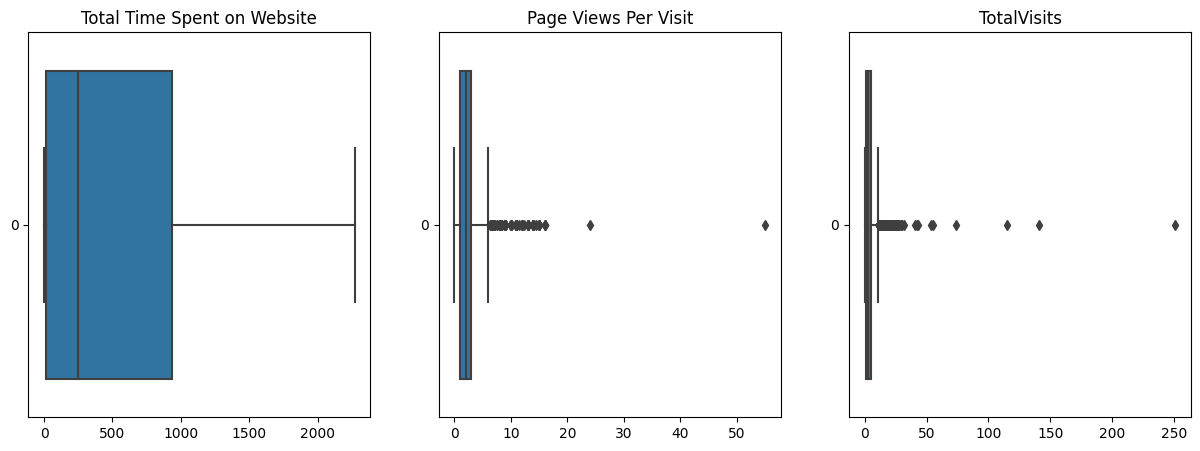

In [49]:
# boxplot for visualizing the data
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title('Total Time Spent on Website')
sns.boxplot(leads_df['Total Time Spent on Website'], orient='h')
plt.subplot(1,3,2)
plt.title('Page Views Per Visit')
sns.boxplot(leads_df['Page Views Per Visit'], orient='h')
plt.subplot(1,3,3)
plt.title('TotalVisits')
sns.boxplot(leads_df['TotalVisits'], orient='h')
plt.show()

##### Inference:
- "Page Views Per Visit" & "TotalVisits" columns has outliers
- For "Page Views Per Visit" & "TotalVisits", we will consider only till 99% percentile data and remove rest of the outliers
- "Total Time Spent on Website" column has no outliers as values are gradually increasing

In [50]:
# remove outliers
leads_df = leads_df[leads_df['Page Views Per Visit'] <= np.percentile(leads_df['Page Views Per Visit'],99)]
leads_df =  leads_df[leads_df['TotalVisits'] <= np.percentile(leads_df['TotalVisits'],99)]
leads_df.shape

(9074, 12)

In [51]:
# Checking the distribution again
leads_df[['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,Page Views Per Visit,TotalVisits
count,9074.000000,9074.000000,9074.000000
mean,484.125083,2.259975,3.116487
std,547.404471,1.880083,2.824993
min,0.000000,0.000000,0.000000
25%,8.000000,1.000000,1.000000
50%,246.000000,2.000000,3.000000
75%,930.000000,3.000000,4.000000
90%,1378.000000,5.000000,7.000000
95%,1558.350000,6.000000,9.000000
99%,1840.270000,8.000000,13.000000


### Combining smaller values as 'Other' for cateorical columns where categorical values > 5


In [52]:
# function to change categories to 'Other' which occured less times
def category_values_change(df, count):
    df1 = df.copy()
    more_cat_dict = dict(df1.value_counts()<count)
    for key in more_cat_dict.keys():
        if more_cat_dict[key]==True:
            df1 = df1.replace(key,'Other')
    return df1

In [53]:
# function category_values_change call for columns having >5 categories
leads_df['Lead Source'] = category_values_change(leads_df['Lead Source'], 200)
leads_df['Last Activity'] = category_values_change(leads_df['Last Activity'], 150)
leads_df['What is your current occupation'] = category_values_change(leads_df['What is your current occupation'], 100)
leads_df['Last Notable Activity'] = category_values_change(leads_df['Last Notable Activity'], 150)

### Univariate Analysis (Categorical)

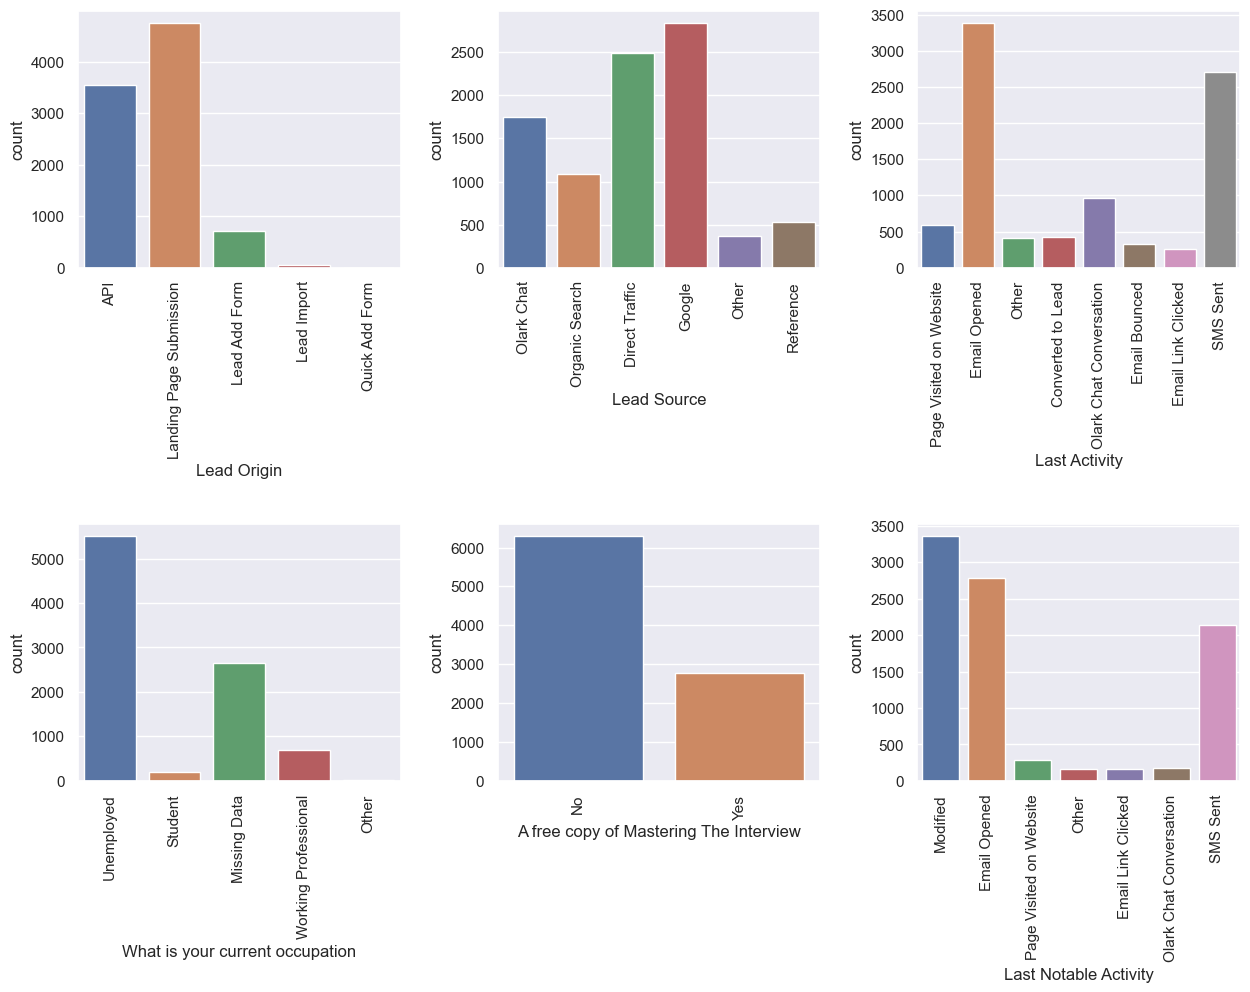

In [54]:
# plotting countplot for categorical variables
cat_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 
                'A free copy of Mastering The Interview', 'Last Notable Activity']

plt.figure(figsize=(15,10))
sns.set()
plt.subplots_adjust(wspace=.3,hspace=1)
i=1
for col in cat_cols:
    plt.subplot(2,3,i)
    sns.countplot(x=leads_df[col]) 
    plt.xticks(rotation=90)
    i+=1
plt.show()

##### Inference:
- API & Landing Page Submission are two major contributor of Lead Origin.
- Direct Traffic and Google are the two main source of Leads.
- Email Opened and SMS Sent are the major Last Activity.
- Most of the lead generated by Unemployed.
- Majority don't want a free copy of Mastering The Interview.

### Univariate Analysis (Continuous)

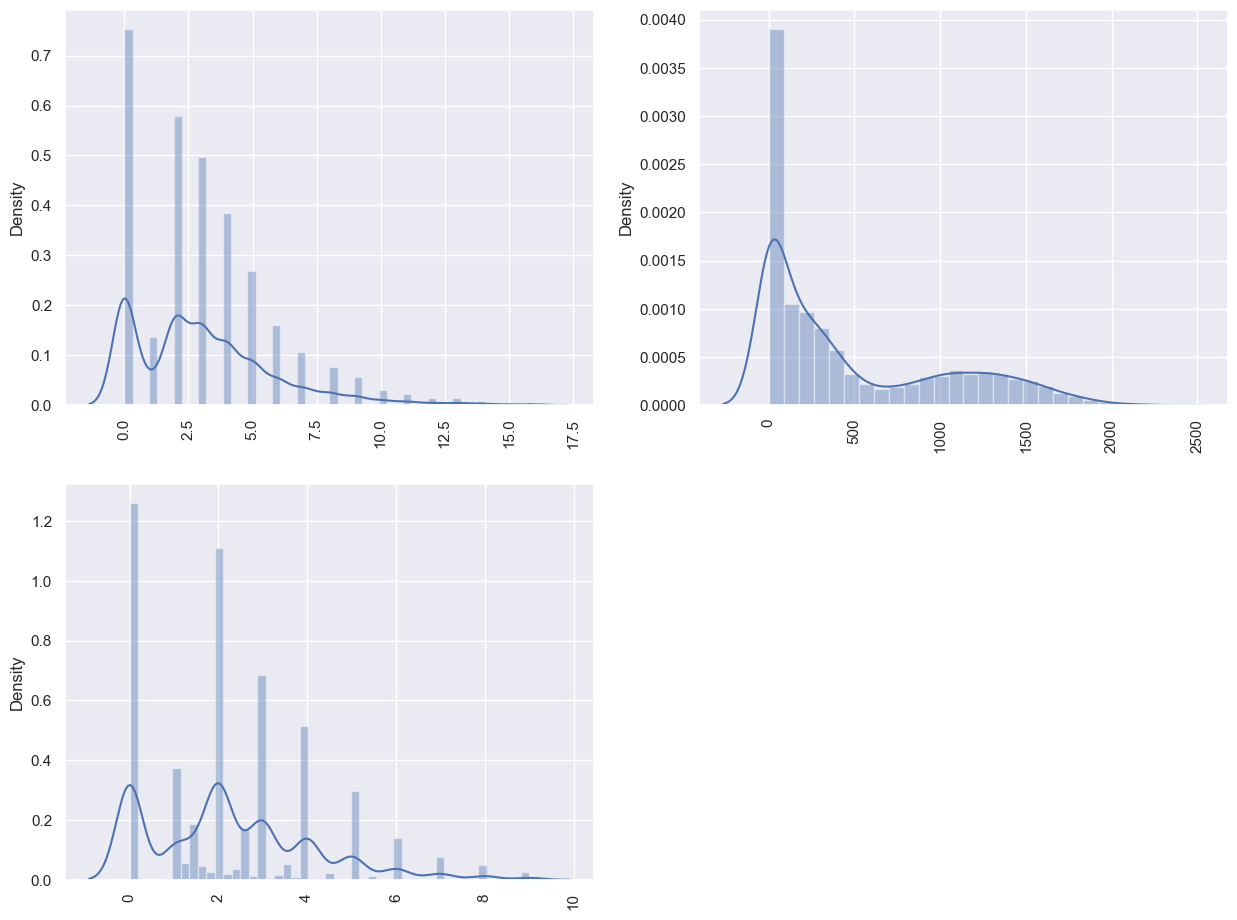

In [55]:
# distribution plot for continuous variables
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize=(15,10))
plt.subplots_adjust(bottom=.01)
i=1
for col in num_cols:    
    plt.subplot(2,2, i)
    sns.distplot(x=leads_df[col])    
    plt.xticks(rotation=90)
    i+=1
plt.show()

##### Inference:
- None of the continuous variables are normally distributed.
- Outliers presence are not there.
- Totalvisits values are between 0-17, Total Time Spent on Website values are between 0-2500 and Page Views Per Visits values are between 0-10

### Bivariate Analysis
Bivariate Analysis With respect to target column 'Converted'

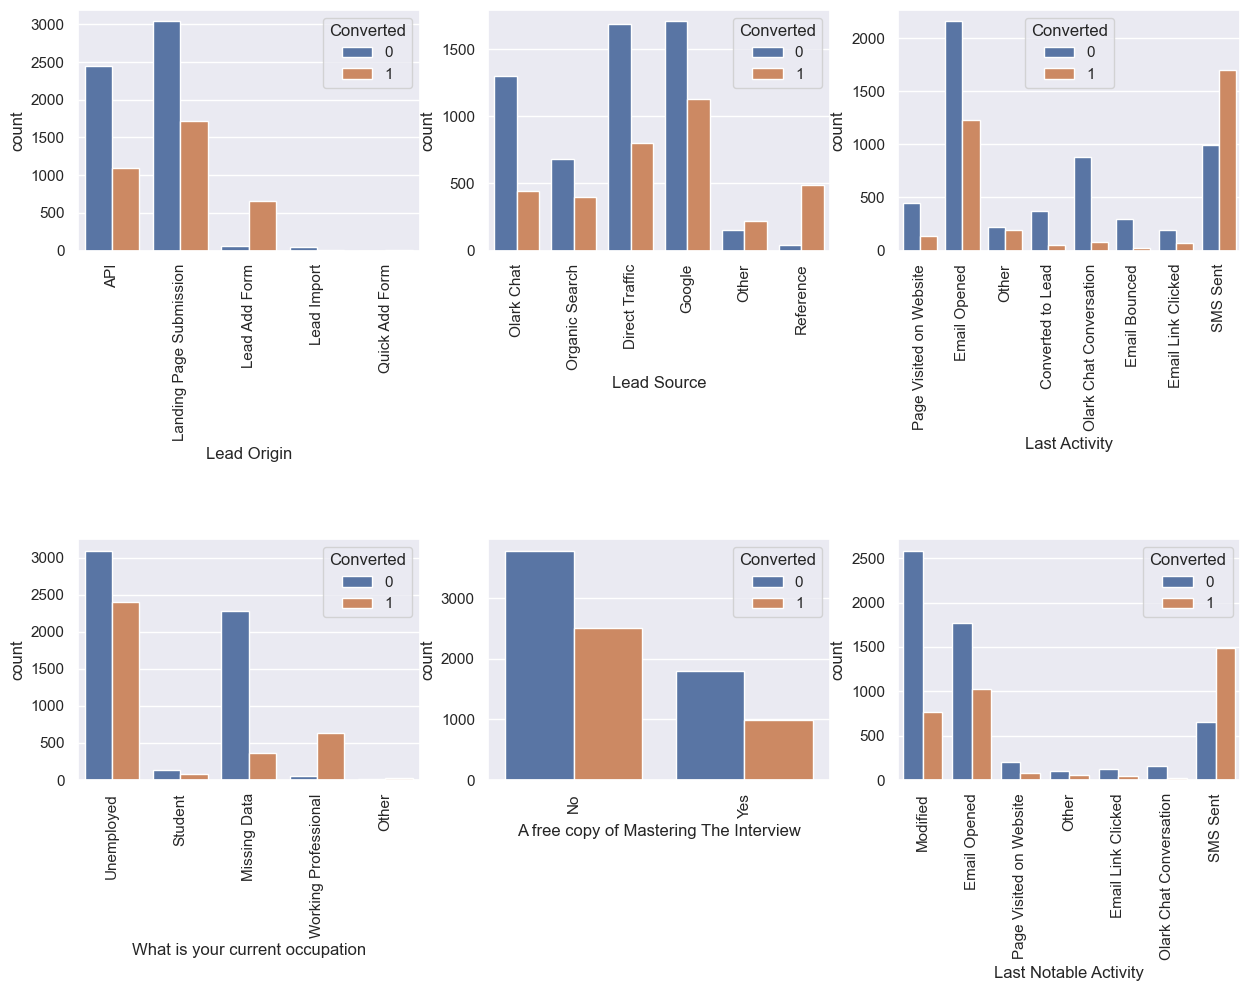

In [56]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
i=1
for col in cat_cols:
    plt.subplot(2,3,i)
    sns.countplot(x=col, hue='Converted', data=leads_df)
    plt.xticks(rotation=90)
    i+=1
plt.show()

##### Inference:
- Lead Origin : Hot leads are more  in Landing Page Submission, API and Lead Add Form.
- Lead Source: Hot leads are higher in Direct Traffic and Google.
- Last Activity: Hot leads are higher in SMS Sent and EMAIL Opened.
- What is your current occupation: Hot leads are mostly generated by Unemployed and Working Professional.
- A free copy of Mastering The Interview: Hot leads are more with answer No.
- Last Notable Activity: Similar to Last Activity.

## Data Preparation and Features Selection

In [57]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [58]:
# 'Last Activity' and 'Last Notable Activity' are similar columns.
# dropping 'Last Notable Activity'
leads_df.drop('Last Notable Activity', axis=1, inplace=True)

# 'Prospect ID' and 'Lead Number' are having all unique values and acting as ID
# dropping 'Prospect ID'
leads_df.drop('Prospect ID', axis=1, inplace=True)

# 'Lead Number' as index
leads_df=leads_df.set_index('Lead Number')

### Converting Binary Categorical Variables Yes/No to 1/0

In [59]:
leads_df['A free copy of Mastering The Interview'] = leads_df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

### Lets create dummy variables for categorical columns having more than two categories

#### Creating dummy variables for categorical columns by dropping one level.

In [60]:
# creating dummy variables for column 'Lead Origin'
lo = pd.get_dummies(leads_df['Lead Origin'], prefix= 'LeadOrigin')

# dropping 'LeadOrigin_Lead Import' column
lo.drop(['LeadOrigin_Lead Import'], axis=1, inplace=True)

# adding the results to the master dataframe
leads_df = pd.concat([leads_df,lo], axis=1)

# dropping original 'Lead Origin' column
leads_df.drop('Lead Origin', axis=1, inplace=True)

In [61]:
# creating dummy variables for column 'Lead Source'
ls = pd.get_dummies(leads_df['Lead Source'], prefix= 'LeadSource')

# dropping 'LeadSource_Other' column
ls.drop(['LeadSource_Other'], axis=1, inplace=True)

# adding the results to the master dataframe
leads_df = pd.concat([leads_df,ls], axis=1)

# dropping original 'Lead Source' column
leads_df.drop('Lead Source', axis=1, inplace=True)

In [62]:
# creating dummy variables for column 'Last Activity'
la = pd.get_dummies(leads_df['Last Activity'], prefix= 'LastActivity')

# dropping 'LastActivity_Other' column
la.drop(['LastActivity_Other'], axis=1, inplace=True)

# adding the results to the master dataframe
leads_df = pd.concat([leads_df,la], axis=1)

# dropping original 'Last Activity' column
leads_df.drop('Last Activity', axis=1, inplace=True)

In [63]:
# creating dummy variables for column 'What is your current occupation'
co = pd.get_dummies(leads_df['What is your current occupation'], prefix= 'What_is_your_current_occupation')

# dropping 'What_is_your_current_occupation_Other' column
co.drop(['What_is_your_current_occupation_Other'], axis=1, inplace=True)

# adding the results to the master dataframe
leads_df = pd.concat([leads_df,co], axis=1)

# dropping original 'What is your current occupation' column
leads_df.drop('What is your current occupation', axis=1, inplace=True)

In [64]:
# Lets look at the head of dataset
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Quick Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,What_is_your_current_occupation_Missing Data,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
660727,1,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
660719,0,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
660681,1,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [65]:
# Lets get the dataset info
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 660737 to 579533
Data columns (total 25 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   A free copy of Mastering The Interview                9074 non-null   int64  
 5   LeadOrigin_API                                        9074 non-null   uint8  
 6   LeadOrigin_Landing Page Submission                    9074 non-null   uint8  
 7   LeadOrigin_Lead Add Form                              9074 non-null   uint8  
 8   LeadOrigin_Quick Add Form                          

In [66]:
# Lets get the shape of dataset
leads_df.shape

(9074, 25)

## Test - Train Split

In [67]:
# segregating features to X
X = leads_df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Quick Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,What_is_your_current_occupation_Missing Data,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
660728,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
660727,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
660719,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
660681,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [68]:
# segregating target variable 'Converted'
y = leads_df[['Converted']]
y.head()

,Converted
Lead Number,
660737,0
660728,0
660727,1
660719,0
660681,1


In [69]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [70]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadOrigin_Quick Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Reference',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_Email Link Clicked', 'LastActivity_Email Opened',
       'LastActivity_Olark Chat Conversation',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent',
       'What_is_your_current_occupation_Missing Data',
       'What_is_your_current_occupation_Student',
       'What_is_your_current_occupation_Unemployed',
       'What_is_your_current_occupation_Working Professional'],
      dtype='object')

In [71]:
y_train.columns

Index(['Converted'], dtype='object')

In [72]:
# Noramalizing the numerical columns
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
    X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Quick Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,What_is_your_current_occupation_Missing Data,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,
631282,0.3125,0.652020,0.555556,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
649474,0.0000,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
579735,0.0000,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
614563,0.5000,0.075455,0.444444,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
588646,0.0000,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [73]:
# check conversion rate
Conversion = (sum(leads_df['Converted'])/len(leads_df['Converted']))*100
Conversion

38.494599955918005

Conversion rate is around 37%

### Looking at Correlations

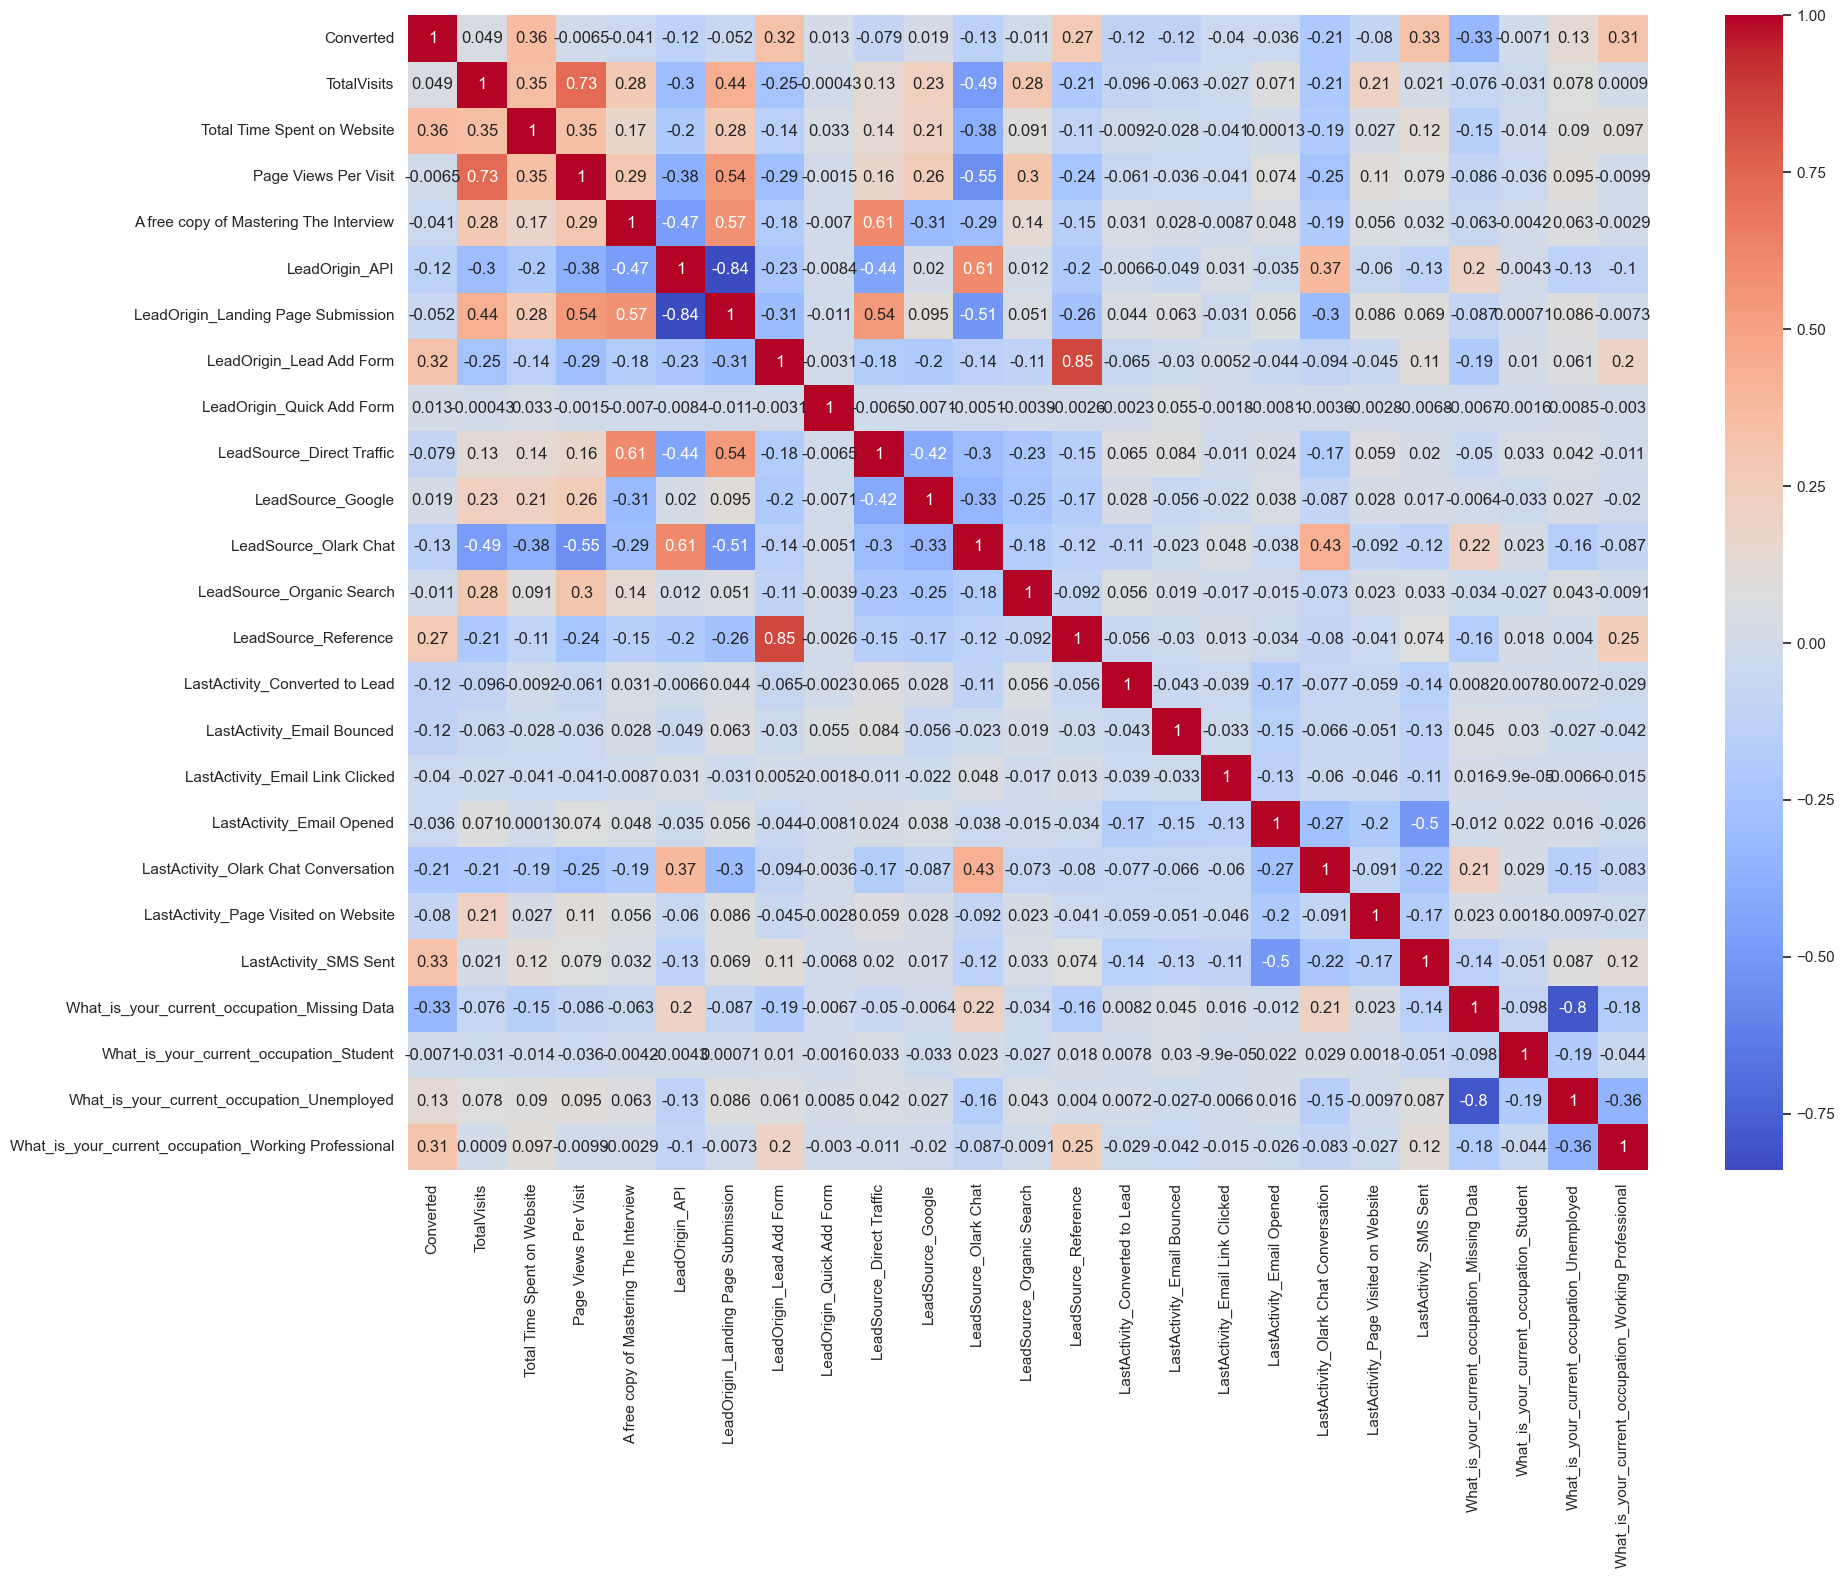

In [74]:
# check correlation matrix 
plt.figure(figsize = (20,15))
sns.heatmap(leads_df.corr(),annot = True, cmap = 'coolwarm')
plt.show()

##### Inference:
- Some variables have a high correaltion
- Using RFE to select top 15 features

### Feature Selection Using RFE

In [75]:
# initializing logistic regression object
logreg = LogisticRegression()

# RFE with top 15 features to select
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [76]:
# consolidating columns and their RFE rank
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 9),
 ('LeadOrigin_API', False, 4),
 ('LeadOrigin_Landing Page Submission', False, 3),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Quick Add Form', False, 7),
 ('LeadSource_Direct Traffic', True, 1),
 ('LeadSource_Google', False, 8),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 10),
 ('LeadSource_Reference', False, 2),
 ('LastActivity_Converted to Lead', True, 1),
 ('LastActivity_Email Bounced', True, 1),
 ('LastActivity_Email Link Clicked', False, 6),
 ('LastActivity_Email Opened', True, 1),
 ('LastActivity_Olark Chat Conversation', True, 1),
 ('LastActivity_Page Visited on Website', False, 5),
 ('LastActivity_SMS Sent', True, 1),
 ('What_is_your_current_occupation_Missing Data', True, 1),
 ('What_is_your_current_occupation_Student', True, 1),
 ('What_is_your_current_occupation_Unemployed', T

In [77]:
# RFE selected features
rfe_cols1 = X_train.columns[rfe.support_]
rfe_cols1

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Olark Chat', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Email Opened',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'What_is_your_current_occupation_Missing Data',
       'What_is_your_current_occupation_Student',
       'What_is_your_current_occupation_Unemployed',
       'What_is_your_current_occupation_Working Professional'],
      dtype='object')

In [78]:
# RFE rejected features
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Quick Add Form',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'LastActivity_Email Link Clicked',
       'LastActivity_Page Visited on Website'],
      dtype='object')

### Building a Logistic Regression using statsmodel

#### VIF Score

In [79]:
# function for vif calculations
def vif_score(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### Model-1

In [80]:
X_train_logreg1 = sm.add_constant(X_train[rfe_cols1])
log_reg_mod1 = sm.GLM(y_train,X_train_logreg1, family = sm.families.Binomial())
log_reg_model1 = log_reg_mod1.fit()
log_reg_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.1
Date:                Tue, 18 Jun 2024   Deviance:                       5116.3
Time:                        22:52:13   Pearson chi2:                 6.61e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4121
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9962      0.602     -1.654      0.098      -2.177       0.185
TotalVisits                                              1.4344      0.294      4.872      0.000       0.857       2.011
Total Time Spent on Website                              4.5305      0.167     27.097      0.000       4.203       4.858
Page Views Per Visit                                    -0.8774      0.266     -3.295      0.001      -1.399      -0.356
LeadOrigin_Lead Add Form                                 3.6029      0.206     17.514      0.000       3.200       4.006
LeadSource_Direct Traffic                               -0.3932      0.084     -4.663      0.000      -0.558      -0.228
LeadSource_Olark Chat                                    1.2359      0.137      9.008      0.000       0.967       1.505
LastActivity_Converted to Lead                          -0.4080      0.229     -1.779      0.075      -0.858       0.042
LastActivity_Email Bounced                              -1.2062      0.309     -3.903      0.000      -1.812      -0.600
LastActivity_Email Opened                                0.5437      0.114      4.762      0.000       0.320       0.767
LastActivity_Olark Chat Conversation                    -0.9853      0.194     -5.091      0.000      -1.365      -0.606
LastActivity_SMS Sent                                    1.7003      0.118     14.416      0.000       1.469       1.932
What_is_your_current_occupation_Missing Data            -2.7621      0.592     -4.665      0.000      -3.923      -1.602
What_is_your_current_occupation_Student                 -1.2758      0.624     -2.046      0.041      -2.498      -0.054
What_is_your_current_occupation_Unemployed              -1.4631      0.588     -2.487      0.013      -2.616      -0.310
What_is_your_current_occupation_Working Professional     1.0341      0.615      1.682      0.093      -0.171       2.239
========================================================================================================================
"""

In [81]:
# function for vif calculations
# def vif_score(df):
#     vif = pd.DataFrame()
#     vif['Features'] = df.columns
#     vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
#     vif['VIF'] = round(vif['VIF'], 2)
#     vif = vif.sort_values(by = "VIF", ascending = False)
#     return vif

In [82]:
# calculate VIF
vif_score(X_train[rfe_cols1])

,Features,VIF
13,What_is_your_current_occupation_Unemployed,10.49
2,Page Views Per Visit,6.49
11,What_is_your_current_occupation_Missing Data,5.58
0,TotalVisits,5.27
8,LastActivity_Email Opened,3.62
10,LastActivity_SMS Sent,3.17
5,LeadSource_Olark Chat,2.94
14,What_is_your_current_occupation_Working Profes...,2.41
1,Total Time Spent on Website,2.27
9,LastActivity_Olark Chat Conversation,2.04


##### Inference:
- 'What_is_your_current_occupation_Working Professional' is insignificant because it has high p-value (>0.05) so it is to be dropped

In [83]:
rfe_cols2 = rfe_cols1.drop('What_is_your_current_occupation_Working Professional', 1)
rfe_cols2

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Olark Chat', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Email Opened',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'What_is_your_current_occupation_Missing Data',
       'What_is_your_current_occupation_Student',
       'What_is_your_current_occupation_Unemployed'],
      dtype='object')

#### Model-2

In [84]:
X_train_logreg2 = sm.add_constant(X_train[rfe_cols2])
log_reg_mod2 = sm.GLM(y_train,X_train_logreg2, family = sm.families.Binomial())
log_reg_model2 = log_reg_mod2.fit()
log_reg_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.4
Date:                Tue, 18 Jun 2024   Deviance:                       5118.8
Time:                        22:52:13   Pearson chi2:                 6.55e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4119
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.0408      0.223     -0.183      0.855      -0.478       0.397
TotalVisits                                      1.4263      0.294      4.844      0.000       0.849       2.003
Total Time Spent on Website                      4.5275      0.167     27.089      0.000       4.200       4.855
Page Views Per Visit                            -0.8737      0.266     -3.282      0.001      -1.395      -0.352
LeadOrigin_Lead Add Form                         3.5999      0.206     17.501      0.000       3.197       4.003
LeadSource_Direct Traffic                       -0.3944      0.084     -4.678      0.000      -0.560      -0.229
LeadSource_Olark Chat                            1.2341      0.137      8.998      0.000       0.965       1.503
LastActivity_Converted to Lead                  -0.4008      0.229     -1.750      0.080      -0.850       0.048
LastActivity_Email Bounced                      -1.1961      0.308     -3.877      0.000      -1.801      -0.591
LastActivity_Email Opened                        0.5472      0.114      4.790      0.000       0.323       0.771
LastActivity_Olark Chat Conversation            -0.9899      0.194     -5.103      0.000      -1.370      -0.610
LastActivity_SMS Sent                            1.7060      0.118     14.463      0.000       1.475       1.937
What_is_your_current_occupation_Missing Data    -3.7187      0.192    -19.366      0.000      -4.095      -3.342
What_is_your_current_occupation_Student         -2.2317      0.275     -8.114      0.000      -2.771      -1.693
What_is_your_current_occupation_Unemployed      -2.4199      0.179    -13.501      0.000      -2.771      -2.069
================================================================================================================
"""

In [85]:
# calculate VIF
vif_score(X_train[rfe_cols2])

,Features,VIF
2,Page Views Per Visit,6.08
13,What_is_your_current_occupation_Unemployed,5.12
0,TotalVisits,5.03
11,What_is_your_current_occupation_Missing Data,3.20
8,LastActivity_Email Opened,2.92
10,LastActivity_SMS Sent,2.52
5,LeadSource_Olark Chat,2.42
1,Total Time Spent on Website,2.14
9,LastActivity_Olark Chat Conversation,1.85
4,LeadSource_Direct Traffic,1.57


##### Inference:
- 'LastActivity_Converted to Lead' is insignificant because it has high p-value (>0.05) so it is to be dropped

In [86]:
rfe_cols3 = rfe_cols2.drop('LastActivity_Converted to Lead', 1)
rfe_cols3

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Olark Chat', 'LastActivity_Email Bounced',
       'LastActivity_Email Opened', 'LastActivity_Olark Chat Conversation',
       'LastActivity_SMS Sent', 'What_is_your_current_occupation_Missing Data',
       'What_is_your_current_occupation_Student',
       'What_is_your_current_occupation_Unemployed'],
      dtype='object')

#### Model-3

In [87]:
X_train_logreg3 = sm.add_constant(X_train[rfe_cols3])
log_reg_mod3 = sm.GLM(y_train,X_train_logreg3, family = sm.families.Binomial())
log_reg_model3 = log_reg_mod3.fit()
log_reg_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.0
Date:                Tue, 18 Jun 2024   Deviance:                       5122.0
Time:                        22:52:14   Pearson chi2:                 6.54e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4116
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.1556      0.214     -0.727      0.467      -0.575       0.264
TotalVisits                                      1.5197      0.290      5.234      0.000       0.951       2.089
Total Time Spent on Website                      4.5271      0.167     27.109      0.000       4.200       4.854
Page Views Per Visit                            -0.8547      0.266     -3.211      0.001      -1.376      -0.333
LeadOrigin_Lead Add Form                         3.6498      0.204     17.904      0.000       3.250       4.049
LeadSource_Direct Traffic                       -0.3936      0.084     -4.671      0.000      -0.559      -0.228
LeadSource_Olark Chat                            1.2741      0.135      9.404      0.000       1.009       1.540
LastActivity_Email Bounced                      -1.1047      0.305     -3.624      0.000      -1.702      -0.507
LastActivity_Email Opened                        0.6324      0.104      6.053      0.000       0.428       0.837
LastActivity_Olark Chat Conversation            -0.9083      0.189     -4.805      0.000      -1.279      -0.538
LastActivity_SMS Sent                            1.7930      0.108     16.580      0.000       1.581       2.005
What_is_your_current_occupation_Missing Data    -3.7243      0.192    -19.382      0.000      -4.101      -3.348
What_is_your_current_occupation_Student         -2.2406      0.275     -8.151      0.000      -2.779      -1.702
What_is_your_current_occupation_Unemployed      -2.4256      0.179    -13.523      0.000      -2.777      -2.074
================================================================================================================
"""

In [88]:
# calculate VIF
vif_score(X_train[rfe_cols3])

,Features,VIF
2,Page Views Per Visit,6.08
0,TotalVisits,4.97
12,What_is_your_current_occupation_Unemployed,4.49
10,What_is_your_current_occupation_Missing Data,2.85
7,LastActivity_Email Opened,2.63
5,LeadSource_Olark Chat,2.42
9,LastActivity_SMS Sent,2.31
1,Total Time Spent on Website,2.12
8,LastActivity_Olark Chat Conversation,1.78
4,LeadSource_Direct Traffic,1.56


##### Inference:
- All features p-value are close to 0
- 'Page Views Per Visit' is insignificant because it has high VIF (>5) so it is to be dropped

In [89]:
rfe_cols4 = rfe_cols3.drop('Page Views Per Visit', 1)
rfe_cols4

Index(['TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Olark Chat', 'LastActivity_Email Bounced',
       'LastActivity_Email Opened', 'LastActivity_Olark Chat Conversation',
       'LastActivity_SMS Sent', 'What_is_your_current_occupation_Missing Data',
       'What_is_your_current_occupation_Student',
       'What_is_your_current_occupation_Unemployed'],
      dtype='object')

#### Model-4

In [90]:
X_train_logreg4 = sm.add_constant(X_train[rfe_cols4])
log_reg_mod4 = sm.GLM(y_train,X_train_logreg4, family = sm.families.Binomial())
log_reg_model4 = log_reg_mod4.fit()
log_reg_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.2
Date:                Tue, 18 Jun 2024   Deviance:                       5132.4
Time:                        22:52:14   Pearson chi2:                 6.57e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4106
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3056      0.209     -1.463      0.143      -0.715       0.104
TotalVisits                                      1.0240      0.247      4.146      0.000       0.540       1.508
Total Time Spent on Website                      4.5354      0.167     27.160      0.000       4.208       4.863
LeadOrigin_Lead Add Form                         3.8064      0.199     19.175      0.000       3.417       4.195
LeadSource_Direct Traffic                       -0.3727      0.084     -4.438      0.000      -0.537      -0.208
LeadSource_Olark Chat                            1.4376      0.126     11.382      0.000       1.190       1.685
LastActivity_Email Bounced                      -1.0974      0.305     -3.599      0.000      -1.695      -0.500
LastActivity_Email Opened                        0.6043      0.104      5.807      0.000       0.400       0.808
LastActivity_Olark Chat Conversation            -0.9102      0.188     -4.829      0.000      -1.280      -0.541
LastActivity_SMS Sent                            1.7502      0.107     16.338      0.000       1.540       1.960
What_is_your_current_occupation_Missing Data    -3.7106      0.192    -19.343      0.000      -4.087      -3.335
What_is_your_current_occupation_Student         -2.2285      0.275     -8.103      0.000      -2.767      -1.689
What_is_your_current_occupation_Unemployed      -2.4213      0.179    -13.513      0.000      -2.772      -2.070
================================================================================================================
"""

In [91]:
# calculate VIF
vif_score(X_train[rfe_cols4])

,Features,VIF
11,What_is_your_current_occupation_Unemployed,4.17
0,TotalVisits,3.07
9,What_is_your_current_occupation_Missing Data,2.69
6,LastActivity_Email Opened,2.55
8,LastActivity_SMS Sent,2.21
4,LeadSource_Olark Chat,2.20
1,Total Time Spent on Website,2.11
7,LastActivity_Olark Chat Conversation,1.77
3,LeadSource_Direct Traffic,1.56
2,LeadOrigin_Lead Add Form,1.25


##### Inference:
- All p-values are below 0.05 and VIFs below 5
- Considering Model-4 i.e. log_reg_model4 as the final model

In [92]:
# predicting values on the train data
y_train_pred = log_reg_model4.predict(X_train_logreg4).values.reshape(-1)
y_train_pred[:10]

array([0.9089112 , 0.02963078, 0.61321326, 0.03413166, 0.02963078,
       0.33514469, 0.78094339, 0.11148348, 0.33514469, 0.08013863])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [93]:
y_train_pred_final = pd.DataFrame({'Lead Number':y_train.index, 'Converted':y_train['Converted'],
                                   'Converted_Prob':y_train_pred})
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,631282,1,0.908911
1,649474,0,0.029631
2,579735,0,0.613213
3,614563,0,0.034132
4,588646,0,0.029631


In [94]:
# taking 0.5 as cutoff
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,Converted_pred
0,631282,1,0.908911,1
1,649474,0,0.029631,0
2,579735,0,0.613213,1
3,614563,0,0.034132,0
4,588646,0,0.029631,0


In [95]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Converted_pred'])
confusion

array([[3417,  462],
       [ 710, 1762]])

In [96]:
# check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Converted_pred']))

0.8154621319477248


### Metrics beyond simply accuracy

In [97]:
# true positives
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1]
# false negatives
FN = confusion[1,0]

In [98]:
# check accuracy of logistic regression model
(TP+TN)/float(TP+TN+FP+FN)

0.8154621319477248

In [99]:
# check sensitivity of logistic regression model
TP / float(TP+FN)

0.7127831715210357

#### We are getting low sensitivity while taking cutoff 0.5

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.8808971384377416

In [101]:
# Calculate false postive rate - predicting Converted when actually didn't Convert
FP/ float(TN+FP)

0.11910286156225831

In [102]:
# positive predictive value 
TP / float(TP+FP)

0.7922661870503597

In [103]:
# Negative predictive value
TN / float(TN+ FN)

0.827962200145384

##### Inference:
- Accuracy: 81.54% - This means that the model correctly predicted the outcome (either positive or negative) for approximately 81.54% of all cases.

- Sensitivity (or Recall): 71.27% - This means that when the actual outcome was positive, the model correctly predicted a positive outcome approximately 71.27% of the time. In other words, it caught about 71.27% of all positive cases.

- Specificity: 88.08% - This means that when the actual outcome was negative, the model correctly predicted a negative outcome approximately 88.08% of the time. It correctly identified about 88.08% of all negative cases.

- False Positive Rate: 11.91% - This is the percentage of negative cases that the model incorrectly predicted as positive. It's essentially the opposite of Specificity.

- Positive Predictive Value (or Precision): 79.22% - This means that when the model predicted a positive outcome, the actual outcome was positive approximately 79.22% of the time.

- Negative Predictive Value: 82.79% - This means that when the model predicted a negative outcome, the actual outcome was negative approximately 82.79% of the time.

### Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( 
    y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

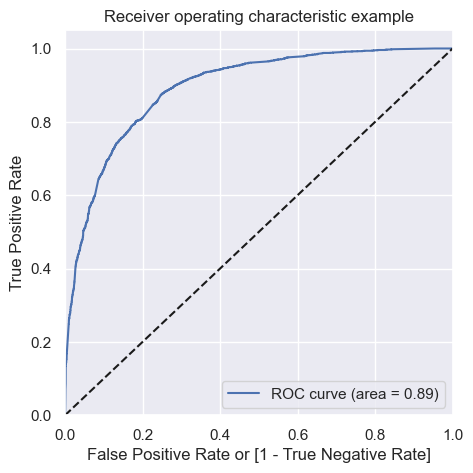

In [106]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

* Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [107]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,631282,1,0.908911,1,1,1,1,1,1,1,1,1,1,1
1,649474,0,0.029631,0,1,0,0,0,0,0,0,0,0,0
2,579735,0,0.613213,1,1,1,1,1,1,1,1,0,0,0
3,614563,0,0.034132,0,1,0,0,0,0,0,0,0,0,0
4,588646,0,0.029631,0,1,0,0,0,0,0,0,0,0,0


In [108]:
# calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389230  1.000000  0.000000
0.1   0.1  0.637537  0.976133  0.421758
0.2   0.2  0.762085  0.924757  0.658417
0.3   0.3  0.798929  0.874595  0.750709
0.4   0.4  0.812785  0.776294  0.836040
0.5   0.5  0.815462  0.712783  0.880897
0.6   0.6  0.809321  0.650081  0.910802
0.7   0.7  0.782396  0.531553  0.942253
0.8   0.8  0.762242  0.446197  0.963650
0.9   0.9  0.713116  0.284385  0.986337


<Figure size 2000x1500 with 0 Axes>

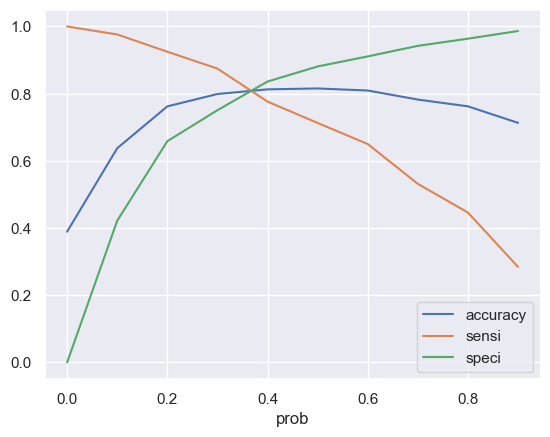

In [109]:
# plot accuracy, sensitivity and specificity for various probabilities
plt.figure(figsize=(20,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

* From the curve above lets take 0.32 as optimum final cutoff.

In [110]:
# taking 0.32 as cutoff
y_train_pred_final['final_predicted']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.32 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,631282,1,0.908911,1,1,1,1,1,1,1,1,1,1,1,1
1,649474,0,0.029631,0,1,0,0,0,0,0,0,0,0,0,0
2,579735,0,0.613213,1,1,1,1,1,1,1,1,0,0,0,1
3,614563,0,0.034132,0,1,0,0,0,0,0,0,0,0,0,0
4,588646,0,0.029631,0,1,0,0,0,0,0,0,0,0,0,0


In [111]:
# checking the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[2976,  903],
       [ 370, 2102]])

### Precision and Recall

In [112]:
# precision score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6995008319467554

In [113]:
# recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8503236245954693

<b><font color = purple size =3>The CEO of X-Education wants lead conversion rate more than 80% hence this model will be suitable for them.

### Precision and Recall Trade-off

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

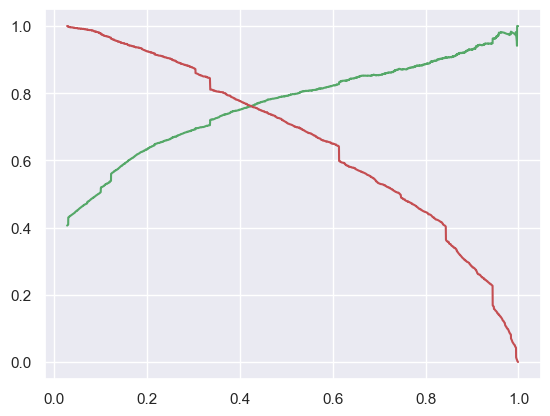

In [115]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
plt.show()

##### Inference:
- From the above curve we can see that precision & recall intersects at 0.41
- From the graph it is also clear that for having Recall >= 80% we have to keep cutoff <=0.32

### Making predictions on the test set

In [116]:
# scaling the test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(
    X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Quick Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,What_is_your_current_occupation_Missing Data,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,
628982,0.2500,0.431869,0.147778,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
644758,0.2500,0.396804,0.444444,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
588992,0.0000,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
619649,0.2500,0.339547,0.444444,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
623651,0.1875,0.508655,0.333333,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [117]:
# adding constant to test dataset
X_test_logreg = sm.add_constant(X_test[rfe_cols4])

In [118]:
# predicting values on the test set
y_test_pred = log_reg_model4.predict(X_test_logreg).values.reshape(-1)
y_test_pred[:10]

array([0.70375417, 0.97069336, 0.09979365, 0.96233078, 0.21658242,
       0.04976453, 0.06923619, 0.10029924, 0.84341255, 0.08287674])

In [119]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities on test dataset
y_test_pred_final = pd.DataFrame({'Lead Number':y_test.index, 'Converted':y_test['Converted'],
                                   'Converted_Prob':y_test_pred})
y_test_pred_final.reset_index(drop=True, inplace=True)
y_test_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,628982,1,0.703754
1,644758,1,0.970693
2,588992,0,0.099794
3,619649,1,0.962331
4,623651,1,0.216582


In [120]:
# taking 0.32 as cutoff as we did with train dataset
y_test_pred_final['test_final_pred'] = y_test_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.32 else 0)
y_test_pred_final.head()

,Lead Number,Converted,Converted_Prob,test_final_pred
0,628982,1,0.703754,1
1,644758,1,0.970693,1
2,588992,0,0.099794,0
3,619649,1,0.962331,1
4,623651,1,0.216582,0


In [121]:
y_test_pred_final.head()

,Lead Number,Converted,Converted_Prob,test_final_pred
0,628982,1,0.703754,1
1,644758,1,0.970693,1
2,588992,0,0.099794,0
3,619649,1,0.962331,1
4,623651,1,0.216582,0


In [122]:
# checking confusion matrix for test data
test_confusion = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['test_final_pred'])
test_confusion

array([[1251,  451],
       [ 149,  872]])

In [123]:
# true positive 
test_TP = test_confusion[1,1]
# true negatives
test_TN = test_confusion[0,0]
 # false positives
test_FP = test_confusion[0,1]
# false negatives
test_FN = test_confusion[1,0]

In [124]:
# accuracy of logistic regression model on test dataset
(test_TP+test_TN)/float(test_TP+test_TN+test_FP+test_FN)

0.779654792508263

In [125]:
# sensitivity of logistic regression model on test dataset
test_TP / float(test_TP+test_FN)

0.8540646425073457

In [126]:
# specificity of logistic regression model on test dataset
test_TN / float(test_TN+test_FP)

0.7350176263219741

### Precision and Recall on test dataset

In [127]:
# precision score of logistic regression model on test dataset
precision_score(y_test_pred_final.Converted, y_test_pred_final.test_final_pred)

0.6591080876795162

In [128]:
# recall score of logistic regression model on test dataset
recall_score(y_test_pred_final.Converted, y_test_pred_final.test_final_pred)

0.8540646425073457

##### Inference:
On running the model on the Test Dataset these are the figures we obtain:
- Accuracy: 77.96%
- Sensitivity/Recall: 85.40%
- Specificity: 73.50%

<b><font color = purple size =3>The prediction by model-4 i.e. log_reg_model4 for train & test data is almost similar, hence we can adopt this model.

### Conclusion:
Below are the variables that are most important (in order of priority) for being the potential buyers are:
- Total Time Spent on Website
- When LeadOrigin is 'Lead Add Form'
- When LastActivity was 'SMS Sent'
- When LeadSource is 'Olark Chat'
- TotalVisits
- When LastActivity was 'Email Opened'

Below are the variables that can lead a negative impact (in order of most impact) on the conversion:
- What_is_your_current_occupation has Missing Data
- What_is_your_current_occupation is 'Unemployed'
- What_is_your_current_occupation is 'Student'
- LastActivity was 'Email Bounced'
- LastActivity was 'Olark Chat Conversation'
- LeadSource was 'Direct Traffic'